In [3]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 1
    
# %aimport b6_epilepsies 
# import b6_epilepsies as b6 #.py file in the same dir as this .ipynb
import seaborn as sns
import wellmap
import pandas as pd
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
date = "241006"
box1 = "14"
box2 = "15"
cbox = box1
exp  = "PNPO"

name = date+"_"+box1+"_"+box2+"_"+exp

path  = name+"/"

# fname_RAW = date+"_"+cbox+"_RAWs.CSV"
# raw_files = [
#         [name, name+".csv", name+".toml"]
#         ]
# 
# wellmap.show(path+name+'.toml');

# data = b.Data(path, files)
# df = data.prepare_raw_data()
# df = pd.read_csv(path+fname_RAW, sep=",")


In [6]:
import os
import pandas as pd

# date = "240917"
# box1 = "16"
# box2 = "17"
# cbox = box1
# exp  = "ALDH7A1_20LYS"

# name = date+"_"+box1+"_"+box2+"_"+exp

# path  = name+"/"

# Function to load data from a txt file, accounting for two header rows
def get_data(file_path):
    # Read the first row to get the headers (first row is column headers, second row contains 'middur' and related info)
    headers = pd.read_csv(file_path, sep='\s+', nrows=0).columns
    
    # Dynamically filter columns that start with 'FISH'
    fish_columns = [col for col in headers if col.startswith('FISH')]
    
    # Define column names for the data, including start, end, fish columns, and CLOCK
    column_names = ['start', 'end'] + fish_columns + ['CLOCK', 'NA_1', 'NA_2']

    # Read the data while skipping the first two header rows
    data = pd.read_csv(file_path, sep='\s+', header=None, names=column_names, skiprows=2)
    # print(data.head())
    # Move the values from the incorrect NA_2 to CLOCK
    # data['CLOCK'] = data['NA_2']
    
    # Clear the NA_2 column after moving the values
    # data['NA_2'] = ''
    
    return data

# Function to combine two DataFrames based on matching start, end, and CLOCK columns
def combine_boxes(df_list):
    # Extract the two DataFrames from the list
    if len(df_list) == 2:
        df_box1, df_box2 = df_list
    else:
        print("Error: There should be exactly two DataFrames to combine.")
        return None

    # Check if 'start', 'end', and 'CLOCK' columns match between the two DataFrames
    if df_box1[['start', 'end', 'CLOCK']].equals(df_box2[['start', 'end', 'CLOCK']]):
        print("start, end, and CLOCK columns match. Proceeding to append fish data.")

        # Dynamically get the fish columns from df_box2
        fish_columns_box2 = [col for col in df_box2.columns if col.startswith('FISH')]
        
        # Select the fish columns from df_box2
        new_fish_columns = df_box2[fish_columns_box2]
        
        # Insert the new fish columns right before the 'CLOCK' column in df_box1
        df_box1 = pd.concat([df_box1.iloc[:, :-3], new_fish_columns, df_box1[['NA_1', 'NA_2', 'CLOCK']]], axis=1)

        print("Fish data from box2 appended successfully.")
        
        # Return the combined DataFrame
        return df_box1
    else:
        print("Error: The 'start', 'end', or 'CLOCK' columns do not match.")
        return None

# Create an empty list to store DataFrames
df_list = []

# Loop through files in the directory and load the ones that match '_DATA.txt'
for f in os.listdir(path):
    if '_DATA.txt' in f:
        file_path = os.path.join(path, f)
        print(f"Loading file: {file_path}")
        data = get_data(file_path)
       
        # Append the DataFrame for each file to the list
        df_list.append(data)
    else:
        pass

# Combine the DataFrames
combined_df = combine_boxes(df_list)

# If the DataFrames were combined successfully, save the result in a MATLAB-readable format
if combined_df is not None:
    # Define the first header row for 192 fish (FISH1 to FISH192)
    first_header_row = ['TIME(SECONDS)', 'NA'] + ['FISH' + str(i+1) for i in range(192)] + ['NA', 'NA', 'CLOCK']
    
    # Define the second header row (middur under each FISH column)
    second_header_row = ['start', 'end'] + ['middur' for _ in range(192)] + ['', '', '']
    
    # Combine first and second header rows
    final_headers = [first_header_row, second_header_row]
    
    # Save the combined DataFrame as a tab-separated .txt file with both header rows
    with open(os.path.join(path, 'combined_data_for_matlab.txt'), 'w') as f:
        # Write the first header row
        f.write('\t'.join(first_header_row) + '\n')
        
        # Write the second header row
        f.write('\t'.join(second_header_row) + '\n')
        
        # Save the data (third row onwards contains the actual data)
        combined_df.to_csv(f, sep='\t', index=False, header=False)

    # print("Combined data saved to 'combined_data_for_matlab.txt' (tab-separated, with two headers and corrected CLOCK values)")

Loading file: 241006_14_15_PNPO/241006_14_DATA.txt
Loading file: 241006_14_15_PNPO/241006_15_DATA.txt
start, end, and CLOCK columns match. Proceeding to append fish data.
Fish data from box2 appended successfully.
Combined data saved to 'combined_data_for_matlab.txt' (tab-separated, with two headers and corrected CLOCK values)


In [7]:
combined_df.to_csv(path+'combined_data.txt', sep=' ', index=False, header=True)

In [ ]:
combined_genotype

In [5]:


# THIS CELL COMBINES GENOTYPE FILES AFTER THEY HAVE BEEN GENERATED

import pandas as pd

import os
import pandas as pd

# date = "240917"
# box1 = "16"
# box2 = "17"
# cbox = box1
# exp  = "ALDH7A1_20LYS"

# name = date+"_"+box1+"_"+box2+"_"+exp

# path  = name+"/"

# Load both files with provided paths, date, and box names
file_14 = path + date + '_' + box1 + 'genotype.txt'
file_15 = path + date + '_' + box2 + 'genotype.txt'

# Read the files into dataframes
df_14 = pd.read_csv(file_14, delimiter='\t', header=1)
df_15 = pd.read_csv(file_15, delimiter='\t', header=1)

# Adjust file 15 by adding 96 to all numeric values
df_15_updated = df_15.copy()
for col in df_15.columns:
    df_15_updated[col] = pd.to_numeric(df_15[col], errors='coerce').fillna(0).astype(int)
    df_15_updated[col] = df_15_updated[col].apply(lambda x: x + 96 if x > 0 else None)

# Combine the lists of each genotype, ensuring equal length by filling with None
combined_data = {}
for genotype in df_14.columns:
    combined_data[genotype] = list(df_14[genotype].dropna()) + list(df_15_updated[genotype].dropna())

# Get the maximum length for the combined data to ensure proper alignment
max_length = max([len(v) for v in combined_data.values()])

# Adjust the length of each list to ensure they are all the same length
for key in combined_data:
    combined_data[key] += [None] * (max_length - len(combined_data[key]))

# Create a new dataframe with the same header
new_df = pd.DataFrame(combined_data)

# Set headers
headers = ['Genotype1', 'Genotype1', 'Genotype1']
new_df.columns = headers
new_df.loc[-1] = ['wt', 'hom', 'het']  # Add row 1 as 'wt', 'hom', 'het'
new_df.index = new_df.index + 1  # Shift index
new_df.sort_index(inplace=True)

# Replace None with empty strings to avoid issues with MATLAB reading the file
new_df.fillna('', inplace=True)

# Save the file with UTF-8 encoding and tabs as delimiters for MATLAB compatibility
output_file = path + date + '_00genotype.txt'
new_df.to_csv(output_file, sep='\t', index=False, encoding='utf-8')

print(f"New file saved as: {output_file}")

New file saved as: 241006_14_15_PNPO/241006_00genotype.txt


In [ ]:
smol_df = df.iloc[:,0:5]
# f2 = sns.lineplot(data=df, x="zhrs", y='f2')

f3 = sns.lineplot(data=df, x="zhrs", y='f5')

# highlight a time range
ax.axvspan(0, 14, color="green", alpha=0.6)
plt.show()

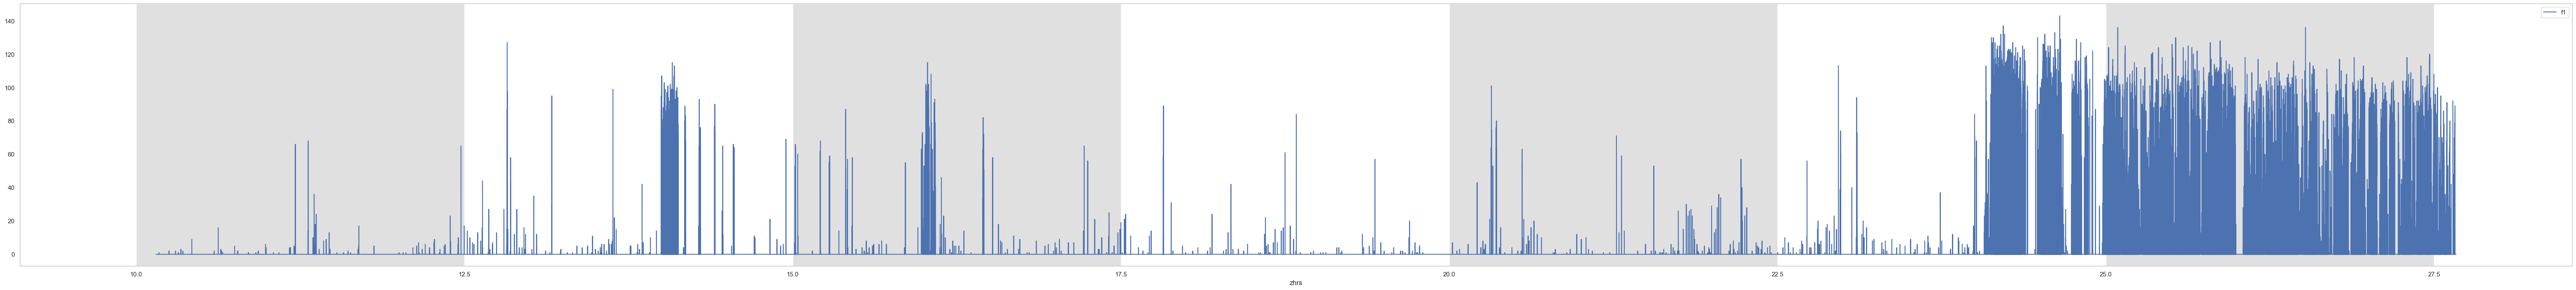

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# time series
ts = smol_df
# ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000)).cumsum()
# numeric series
#ts = pd.Series(np.random.randn(1000),index=np.linspace(25,800,1000)).cumsum()
ax = ts.plot('zhrs','f1',x_compat=True)

ax.grid()

class GridShader():
    def __init__(self, ax, first=True, **kwargs):
        self.spans = []
        self.sf = first
        self.ax = ax
        self.kw = kwargs
        self.ax.autoscale(True, axis="x")
        self.cid = self.ax.callbacks.connect('xlim_changed', self.shade)
        self.shade()
    def clear(self):
        for span in self.spans:
            try:
                span.remove()
            except:
                pass
    def shade(self, evt=None):
        self.clear()
        xticks = self.ax.get_xticks()
        xlim = self.ax.get_xlim()
        xticks = xticks[(xticks > xlim[0]) & (xticks < xlim[-1])]
        locs = np.concatenate(([[xlim[0]], xticks, [xlim[-1]]]))

        start = locs[1-int(self.sf)::2]  
        end = locs[2-int(self.sf)::2]

        for s, e in zip(start, end):
            self.spans.append(self.ax.axvspan(s, e, zorder=0, **self.kw))

gs = GridShader(ax, facecolor="lightgrey", first=False, alpha=0.7)

plt.show()

In [5]:
sns.set(rc={'figure.figsize':(80,8.27)})
sns.set_style("whitegrid")

In [11]:
f2

<AxesSubplot:xlabel='zhrs', ylabel='f2'>

In [5]:
smol_df

,fullts,zhrs,exsecs,f1,f2,f3,f4,f5,f6,f7,...,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96
0,2024-07-07T19:09:08.047290Z,10.152235,0.047290,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-07-07T19:09:08.072731Z,10.152242,0.072731,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-07-07T19:09:08.138958Z,10.152261,0.138958,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
